In [1]:
from tqdm.auto import tqdm
from matplotlib.backends.backend_pdf import PdfPages
from pyprojroot.here import here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
plt.rcParams.update({'font.size': 22})

In [3]:
CELL_TYPES=["Mono", "T_CD4_Naive", "T_CD4_NonNaive", "T_CD8_Naive", "T_CD8_NonNaive", "B", "Plasma", "UTC", "ILC", "pDC", "DC"]
DISEASES = np.array(['BRCA', 'CD', 'COPD', 'COVID', 'CRC', 'HBV', 'HIV', 'HNSCC', 'MS', 'NPC', 'PS', 'PSA', 'RA', 'SLE', 'UC', 'asthma', 'cirrhosis', 'flu', 'healthy', 'sepsis'])

In [3]:
cell_type='Mono'

idxs=np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_idxs.npy'))
adata = ad.read_h5ad(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/data/{cell_type}_adataMerged_SPECTRAgenes.log1p.h5ad'), backed='r')


In [4]:
adata[idxs].obs.disease.values

['COVID', 'COVID', 'COVID', 'COVID', 'COVID', ..., 'PS', 'PS', 'PS', 'PS', 'PS']
Length: 52453
Categories (20, object): ['BRCA', 'CD', 'COPD', 'COVID', ..., 'cirrhosis', 'flu', 'healthy', 'sepsis']

  0%|          | 0/6 [00:00<?, ?it/s]

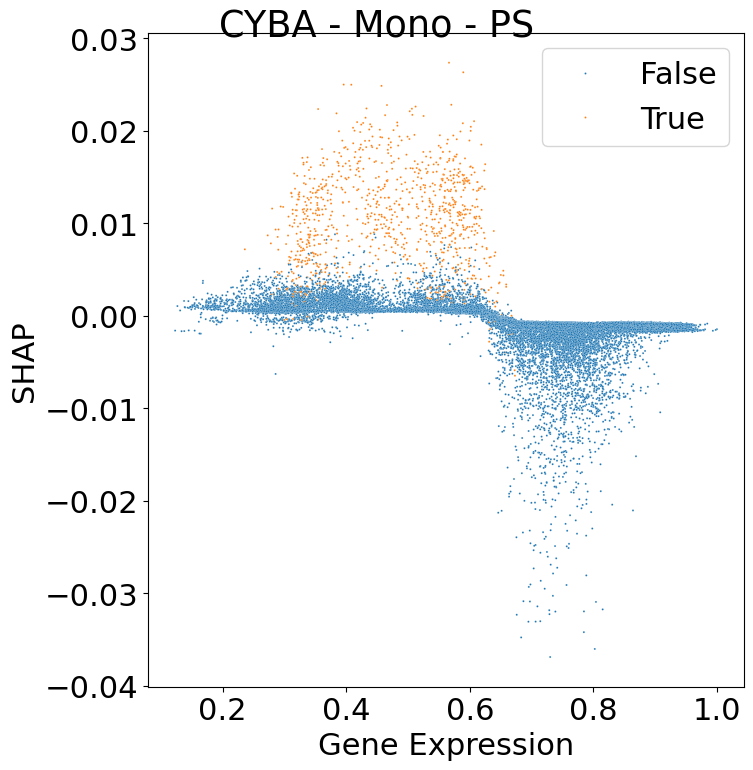

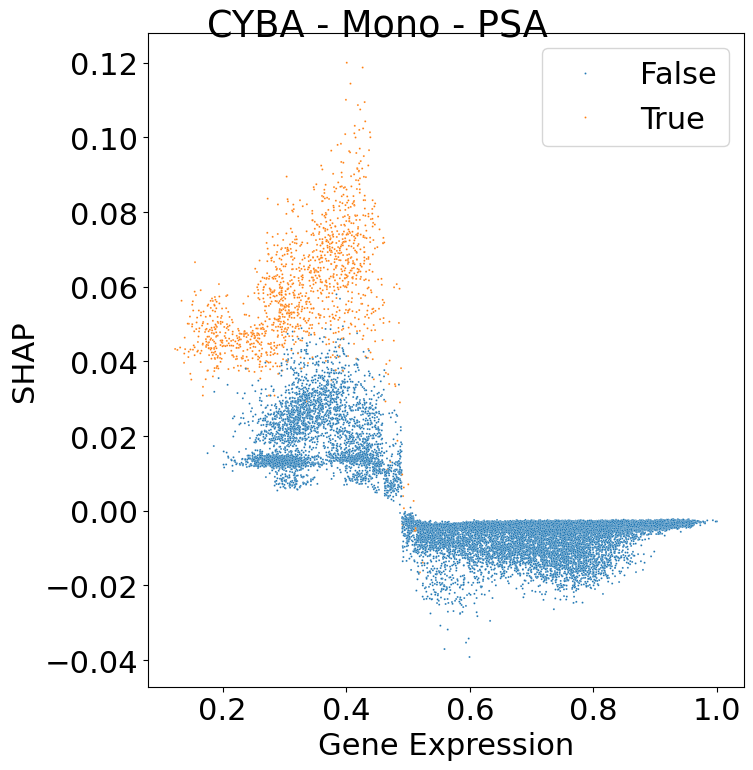

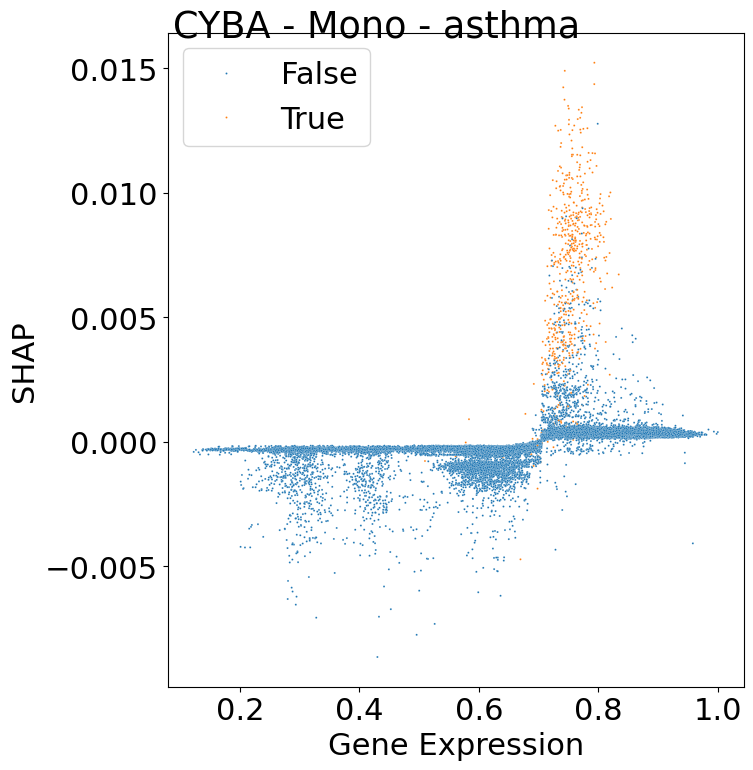

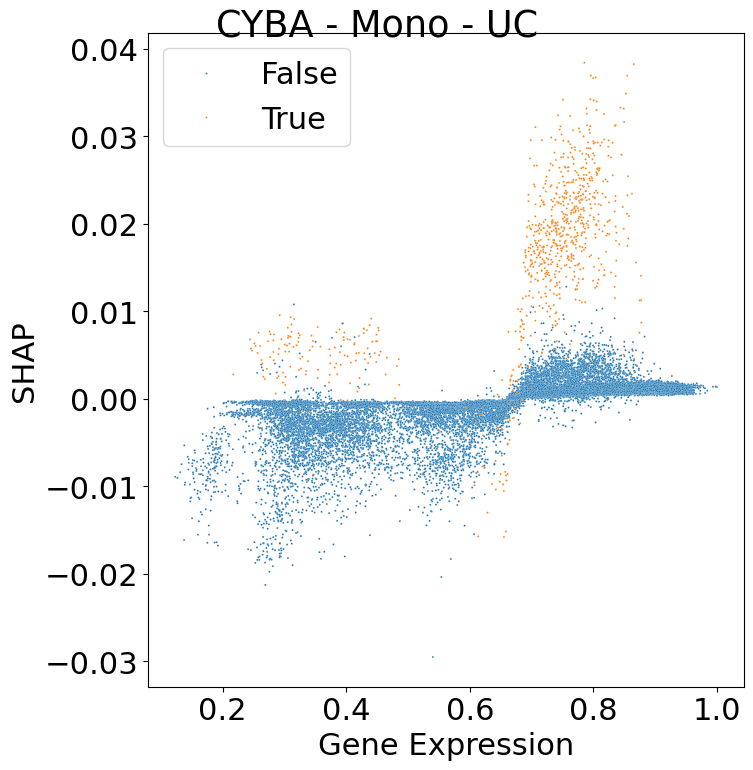

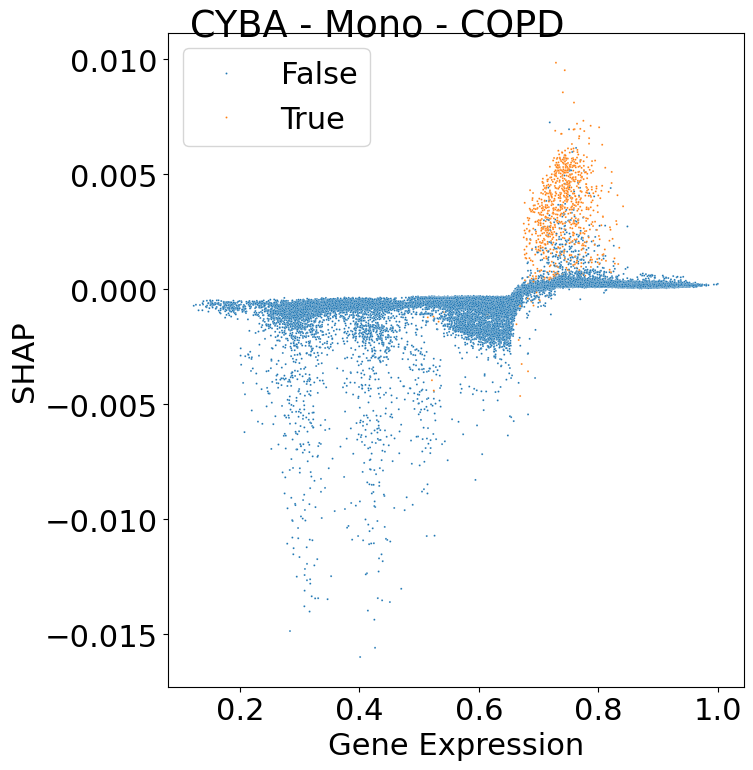

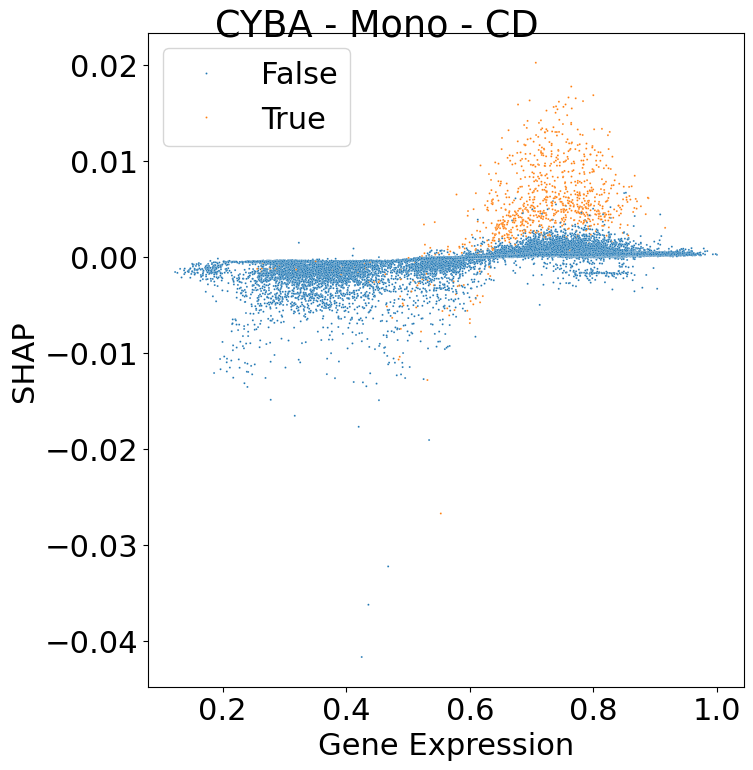

In [13]:
cell_type='Mono'
for disease in tqdm(['PS', 'PSA', 'asthma', 'UC', 'COPD', 'CD']):
    adata = ad.read_h5ad(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/data/{cell_type}_adataMerged_SPECTRAgenes.log1p.h5ad'), backed='r')
    symbols_df = pd.read_pickle(here('inflammabucket_bkp/03_downstream_analysis/04_selected_gene_list.pkl'))
    symbols_sorted = symbols_df.loc[adata.var_names].symbol.values
    gene_expr_subs =  np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_gene_expr_subset.npz'), allow_pickle=True)
    shap_subs =  np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_shap_subset.npz'))['shap_values']
    gene_expr = gene_expr_subs['gene_expr']
    disease_idx = np.nonzero(DISEASES == disease)[0][0]
    gene_idx = np.nonzero(symbols_sorted == 'CYBA')[0][0]
    idxs=np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_idxs.npy'))
    disease_mask = adata[idxs].obs.disease.values==disease   

    _, ax = plt.subplots(figsize=(8,8))
    g = sns.scatterplot(y=shap_subs[:, gene_idx, disease_idx], x=gene_expr[:, gene_idx]/np.max(gene_expr[:, gene_idx]),s=2, hue=disease_mask, ax=ax, rasterized=True)
    plt.ylabel('SHAP')
    plt.xlabel('Gene Expression')
    plt.suptitle(f"CYBA - {cell_type} - {disease}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig(here(f'03_downstream_analysis/08_gene_importance/new_shap_plots/results/jointplot_CYBA_Mono_{disease}.pdf'), dpi=1200, bbox_inches='tight')

  0%|          | 0/6 [00:00<?, ?it/s]

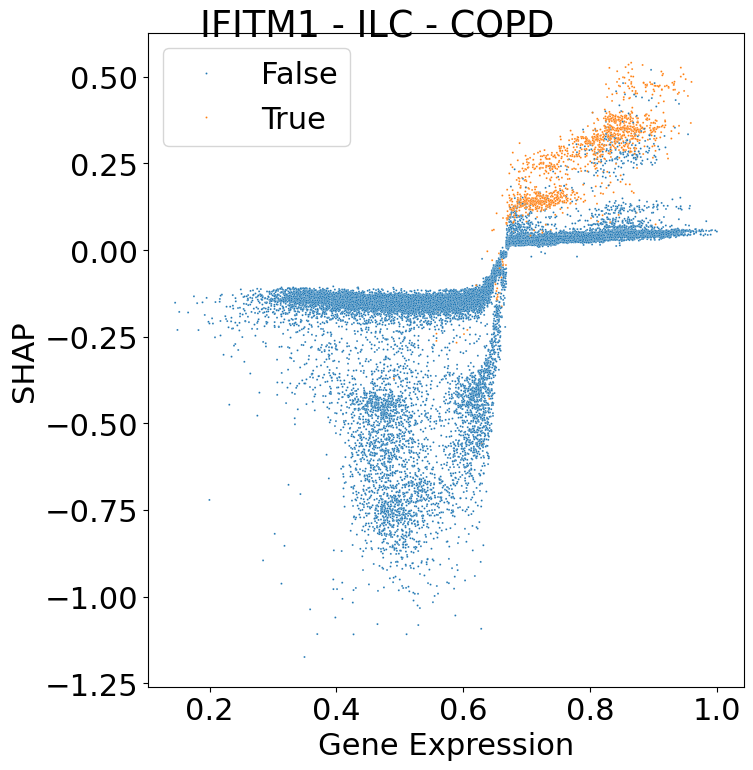

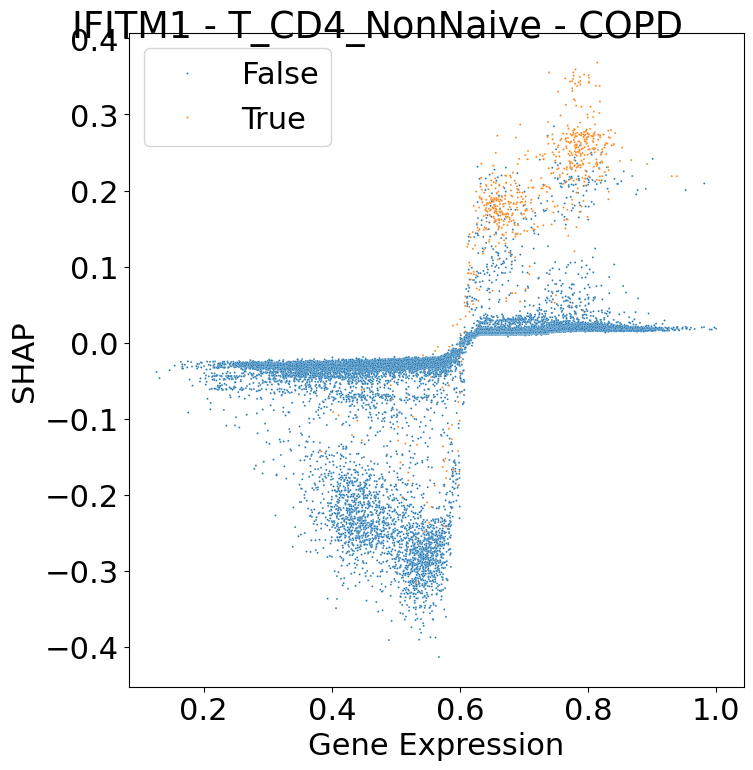

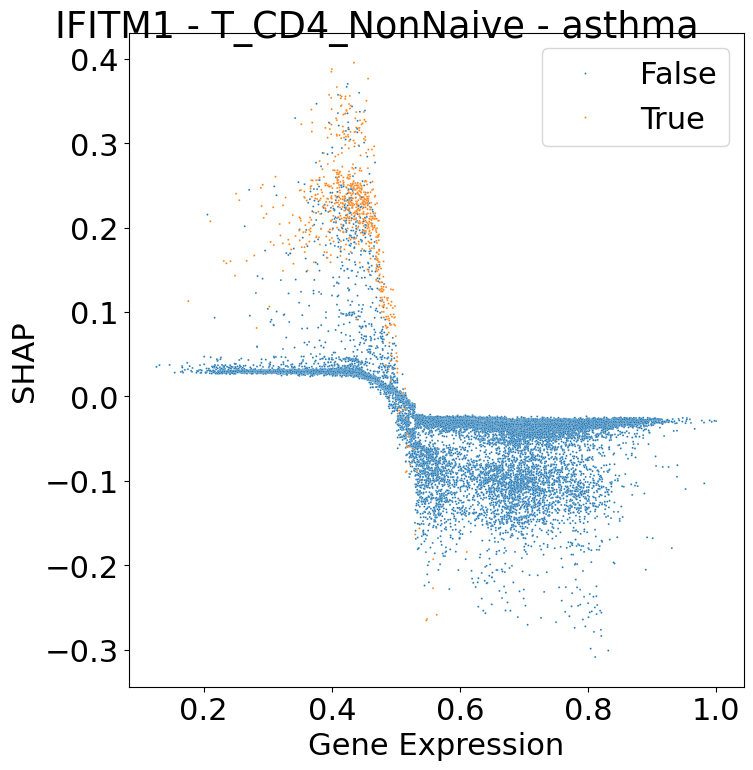

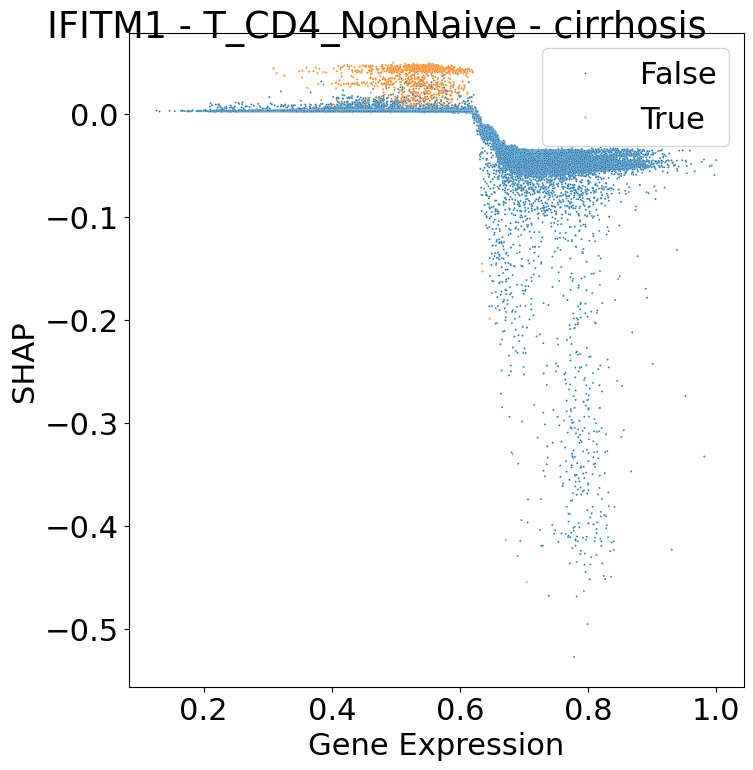

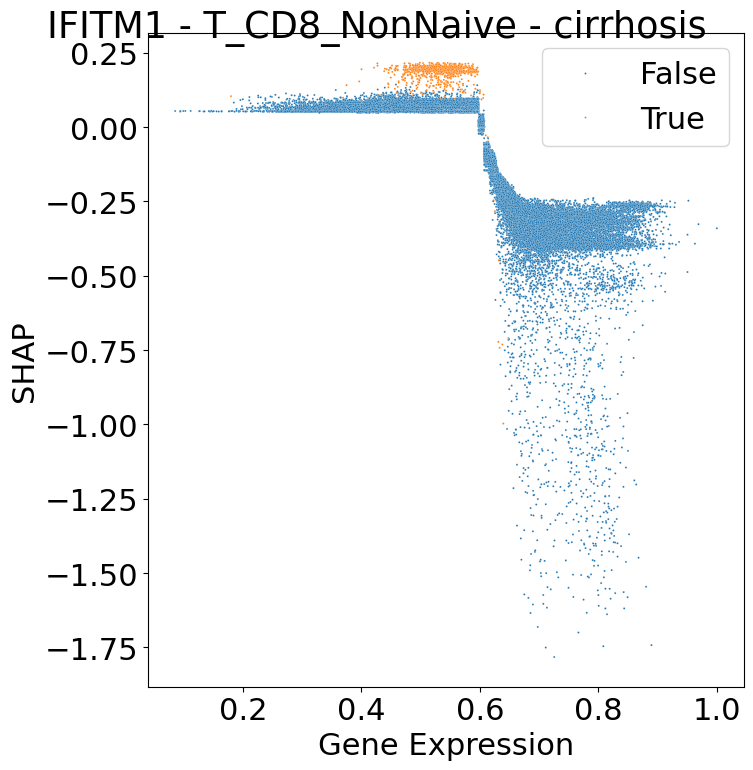

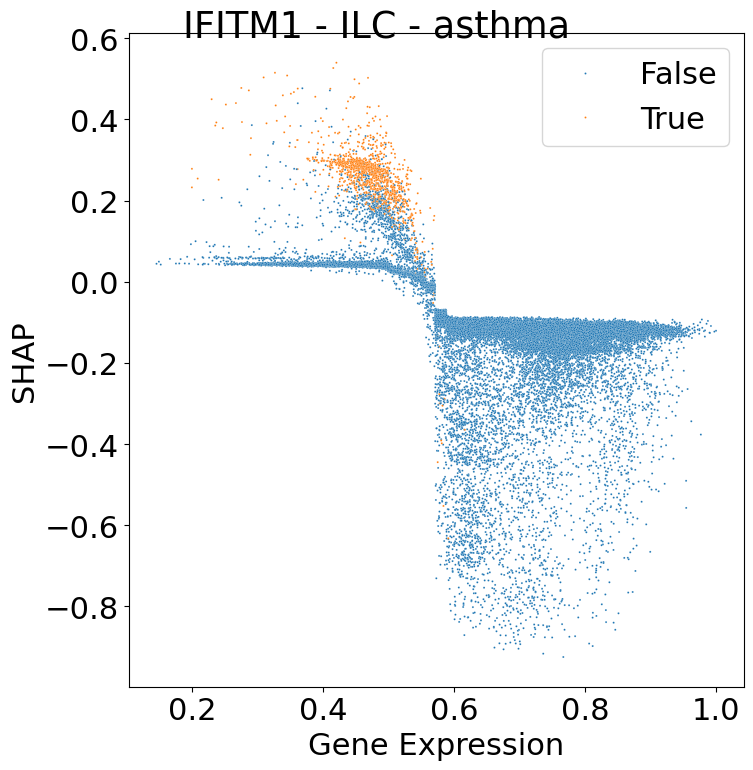

In [14]:
for cell_type, disease in tqdm([
    ('ILC', 'COPD'), 
    ('T_CD4_NonNaive', 'COPD'), 
    ('T_CD4_NonNaive', 'asthma'), 
    ('T_CD4_NonNaive', 'cirrhosis'),
    ('T_CD8_NonNaive', 'cirrhosis'),
    ('ILC', 'asthma'),
    ]):
    adata = ad.read_h5ad(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/data/{cell_type}_adataMerged_SPECTRAgenes.log1p.h5ad'), backed='r')
    symbols_df = pd.read_pickle(here('inflammabucket_bkp/03_downstream_analysis/04_selected_gene_list.pkl'))
    symbols_sorted = symbols_df.loc[adata.var_names].symbol.values
    gene_expr_subs =  np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_gene_expr_subset.npz'), allow_pickle=True)
    shap_subs =  np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_shap_subset.npz'))['shap_values']
    gene_expr = gene_expr_subs['gene_expr']
    disease_idx = np.nonzero(DISEASES == disease)[0][0]
    gene_idx = np.nonzero(symbols_sorted == 'IFITM1')[0][0]
    idxs=np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_idxs.npy'))
    disease_mask = adata[idxs].obs.disease.values==disease   

    _, ax = plt.subplots(figsize=(8,8))
    g = sns.scatterplot(y=shap_subs[:, gene_idx, disease_idx], x=gene_expr[:, gene_idx]/np.max(gene_expr[:, gene_idx]), hue=disease_mask, s=2, ax=ax, rasterized = True)
    plt.ylabel('SHAP')
    plt.xlabel('Gene Expression')
    plt.suptitle(f"IFITM1 - {cell_type} - {disease}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig(here(f'03_downstream_analysis/08_gene_importance/new_shap_plots/results/jointplot_IFITM1_{cell_type}_{disease}.pdf'), dpi=1200, bbox_inches='tight')

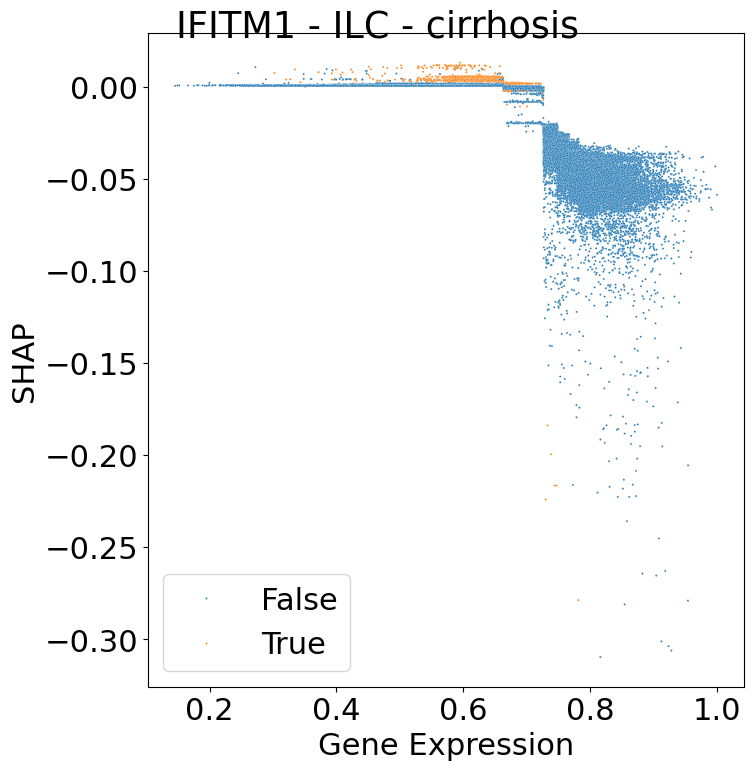

In [4]:
cell_type = 'ILC'
disease = 'cirrhosis'

adata = ad.read_h5ad(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/data/{cell_type}_adataMerged_SPECTRAgenes.log1p.h5ad'), backed='r')
symbols_df = pd.read_pickle(here('inflammabucket_bkp/03_downstream_analysis/04_selected_gene_list.pkl'))
symbols_sorted = symbols_df.loc[adata.var_names].symbol.values
gene_expr_subs =  np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_gene_expr_subset.npz'), allow_pickle=True)
shap_subs =  np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_shap_subset.npz'))['shap_values']
gene_expr = gene_expr_subs['gene_expr']
disease_idx = np.nonzero(DISEASES == disease)[0][0]
gene_idx = np.nonzero(symbols_sorted == 'IFITM1')[0][0]
idxs=np.load(here(f'inflammabucket_bkp/03_downstream_analysis/05_SHAP/results/04_shap/shap_stripplot/{cell_type}_idxs.npy'))
disease_mask = adata[idxs].obs.disease.values==disease   

_, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(y=shap_subs[:, gene_idx, disease_idx], x=gene_expr[:, gene_idx]/np.max(gene_expr[:, gene_idx]), hue=disease_mask, s=2, ax=ax, rasterized = True)
plt.ylabel('SHAP')
plt.xlabel('Gene Expression')
plt.suptitle(f"IFITM1 - {cell_type} - {disease}")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig(here(f'03_downstream_analysis/08_gene_importance/new_shap_plots/results/jointplot_IFITM1_{cell_type}_{disease}.pdf'), dpi=1200, bbox_inches='tight')